In [42]:
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler 
import pandas as pd
import matplotlib.pyplot as plt
import joblib # for saving and loading variables
import os
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import f1_score
from pathlib import Path
import seaborn as sns
from sklearn.model_selection import train_test_split

In [43]:
base_folder = Path('C:/Users/ilkele4s/')

main_results_folder = 'ML_Results'
new_results_folder = 'SVM_stratified_allElectrodes_results'

data_folder = 'Data'
data_file = 'All_Electrodes_data.csv'


In [44]:
results_dir = os.path.join(base_folder,main_results_folder)

new_results_dir = os.path.join(results_dir,new_results_folder)

os.mkdir(new_results_dir)

print(new_results_dir)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\Users\\ilkele4s\\ML_Results\\SVM_stratified_allElectrodes_results'

In [45]:
# load the data 
data_dir = os.path.join(base_folder,data_folder)

data_file_path = os.path.join(data_dir,data_file)

print(data_file_path)

Data = pd.read_csv(data_file_path, header = None)

C:\Users\ilkele4s\Data\All_Electrodes_data.csv


In [46]:
np.shape(Data)

(1440, 17400)

In [47]:
min(Data.min(axis='columns'))

-1.0921493149168

In [48]:
max(Data.max(axis='columns'))

24.0731114186202

In [49]:
# create a label set

n_zones = 45
n_trials = 32

label_set = np.r_[1:n_zones+1]
labels = np.tile(label_set, 32)


In [50]:
# merge samples and labels

Data[17400] = labels

In [51]:
# remove NAN values

Data.dropna(inplace=True)
Data = Data.reset_index()
del Data['index']

In [52]:
Data_shape_noNan = np.shape(Data)
print(Data_shape_noNan)

(889, 17401)


In [53]:
Data.head()

,0,1,2,3,4,5,6,7,8,9,...,17391,17392,17393,17394,17395,17396,17397,17398,17399,17400
0,-0.641177,-0.623621,-0.835555,-0.450092,2.113778,-0.239912,-0.909470,-0.868870,-0.225887,0.192207,...,0.100054,-0.229488,-0.168956,-0.119959,-0.132878,-0.037955,-0.243916,-0.142699,-0.138725,1
1,0.172679,-0.044002,0.136370,0.060064,-0.528674,-0.253855,-0.857574,-0.746933,-0.616906,0.081487,...,-0.158266,-0.238090,-0.212150,-0.192666,-0.333702,0.069094,0.385279,-0.132032,-0.118693,3
2,-0.973045,-0.898037,-0.918644,-0.956632,-0.833060,0.131404,-0.771800,-0.670775,-0.898648,-0.652746,...,-0.013252,-0.176477,-0.296344,-0.154384,-0.026499,0.665561,0.128607,0.092490,0.072999,5
3,-0.268180,0.539558,-0.087995,-0.804609,-0.745309,-0.740893,-0.862641,-0.844809,0.271276,0.557565,...,0.032621,-0.025834,0.126220,0.185783,0.454748,-0.042679,-0.132942,0.023480,0.019001,9
4,-0.837382,-0.388745,-0.397531,-0.719531,-0.659685,-0.753819,-0.234051,-0.063746,-0.633838,-0.391953,...,-0.190948,-0.030475,0.316105,0.147513,0.315826,0.087961,-0.093728,0.037999,0.041059,10


In [54]:
labels_rem = np.array(Data[17400])

In [55]:
np.shape(labels_rem)

(889,)

In [56]:
#print(labels_rem)

In [57]:
samples = np.array(Data.drop(Data.columns[17400],axis = 1))

In [58]:
np.shape(samples)

(889, 17400)

In [59]:
# train - test split

train_samples, test_samples, train_labels, test_labels = train_test_split(samples, labels_rem, test_size=0.20, stratify=labels_rem, random_state=42)

In [19]:
# standardization
data_scale = 0
if data_scale == 1:

    sc = StandardScaler()
    X_train = sc.fit_transform(train_samples)
    X_test = sc.transform(test_samples)

In [20]:
comparison_matrix = X_train[:, np.newaxis] == X_test
true_ind = np.where(comparison_matrix == True)
tekrar = np.shape(true_ind)

if not tekrar[1] == 0 :
    print('Repeated elements!')
else :
     print('No repeated elements!')
          

NameError: name 'X_train' is not defined

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(train_labels, bins=np.arange(47) - 0.5, linewidth=1, edgecolor="white")

In [ ]:
plt.figure(figsize=(15, 10))
plt.hist(test_labels, bins=np.arange(47) - 0.5, linewidth=1, edgecolor="white")

In [65]:
# model training with default parameters

svm_model_base = svm.SVC()
svm_model_base.fit(train_samples,train_labels)

SVC()

In [66]:
# predictions with
prediction_base = svm_model_base.predict(test_samples)

In [67]:
joblib.dump(prediction_base, os.path.join(new_results_dir,'base_prediction.sav'))

['C:\\Users\\ilkele4s\\ML_Results\\SVM_stratified_allElectrodes_results\\base_prediction.sav']

In [68]:
# creating grid

param_grid = [{'class_weight': [None, 'balanced'], 
               'C':[0.5, 1, 10, 100], 
               'gamma': ['scale', 1, 0.1, 0.01, 0.001],
               'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 
               'decision_function_shape': ['ovo','ovr']}]

In [69]:
# grid search

optimal_params = GridSearchCV(svm.SVC(), param_grid, cv=5, scoring='balanced_accuracy', verbose=1)


In [70]:
# grid search
optimization = optimal_params.fit(train_samples, train_labels)


Fitting 5 folds for each of 320 candidates, totalling 1600 fits


KeyboardInterrupt: 

In [36]:
print(optimal_params.best_params_)

{'C': 1, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
joblib.dump(optimal_params.best_params_, os.path.join(new_results_dir,'best_params.sav'))

In [ ]:
dict_string = "\n".join([f"{key}: {value}" for key, value in optimal_params.best_params_.items()])

In [ ]:
file = open(os.path.join(new_results_dir,'best_params.txt'), 'w')
# Write content to the file
file.write(dict_string)

In [71]:
joblib.load(os.path.join(new_results_dir,'best_params.sav'))

{'C': 1,
 'class_weight': 'balanced',
 'decision_function_shape': 'ovo',
 'gamma': 0.1,
 'kernel': 'rbf'}

In [72]:
# getting optimal values for the parameters

C_ = optimal_params.best_params_.get('C')
dfs_ = optimal_params.best_params_.get('decision_function_shape')
gamma_ = optimal_params.best_params_.get('gamma')
kernel_ = optimal_params.best_params_.get('kernel')
weight_ = optimal_params.best_params_.get('class_weight')

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [38]:
# train the model with the optimal values
svm_model_optimized = svm.SVC(C=C_, class_weight=weight_, decision_function_shape=dfs_, gamma=gamma_, kernel=kernel_)
svm_model_optimized.fit(train_samples,train_labels)

SVC(C=1, class_weight='balanced', decision_function_shape='ovo', gamma=1)

In [73]:
# train the model with the optimal values
svm_model_optimized = svm.SVC(C=1, class_weight='balanced', decision_function_shape= 'ovo', gamma=0.1, kernel='rbf')
svm_model_optimized.fit(train_samples,train_labels)

SVC(C=1, class_weight='balanced', decision_function_shape='ovo', gamma=0.1)

In [74]:
prediction_optimized = svm_model_optimized.predict(test_samples)

In [ ]:
joblib.dump(prediction_optimized, os.path.join(new_results_dir,'optimized_prediction.sav'))

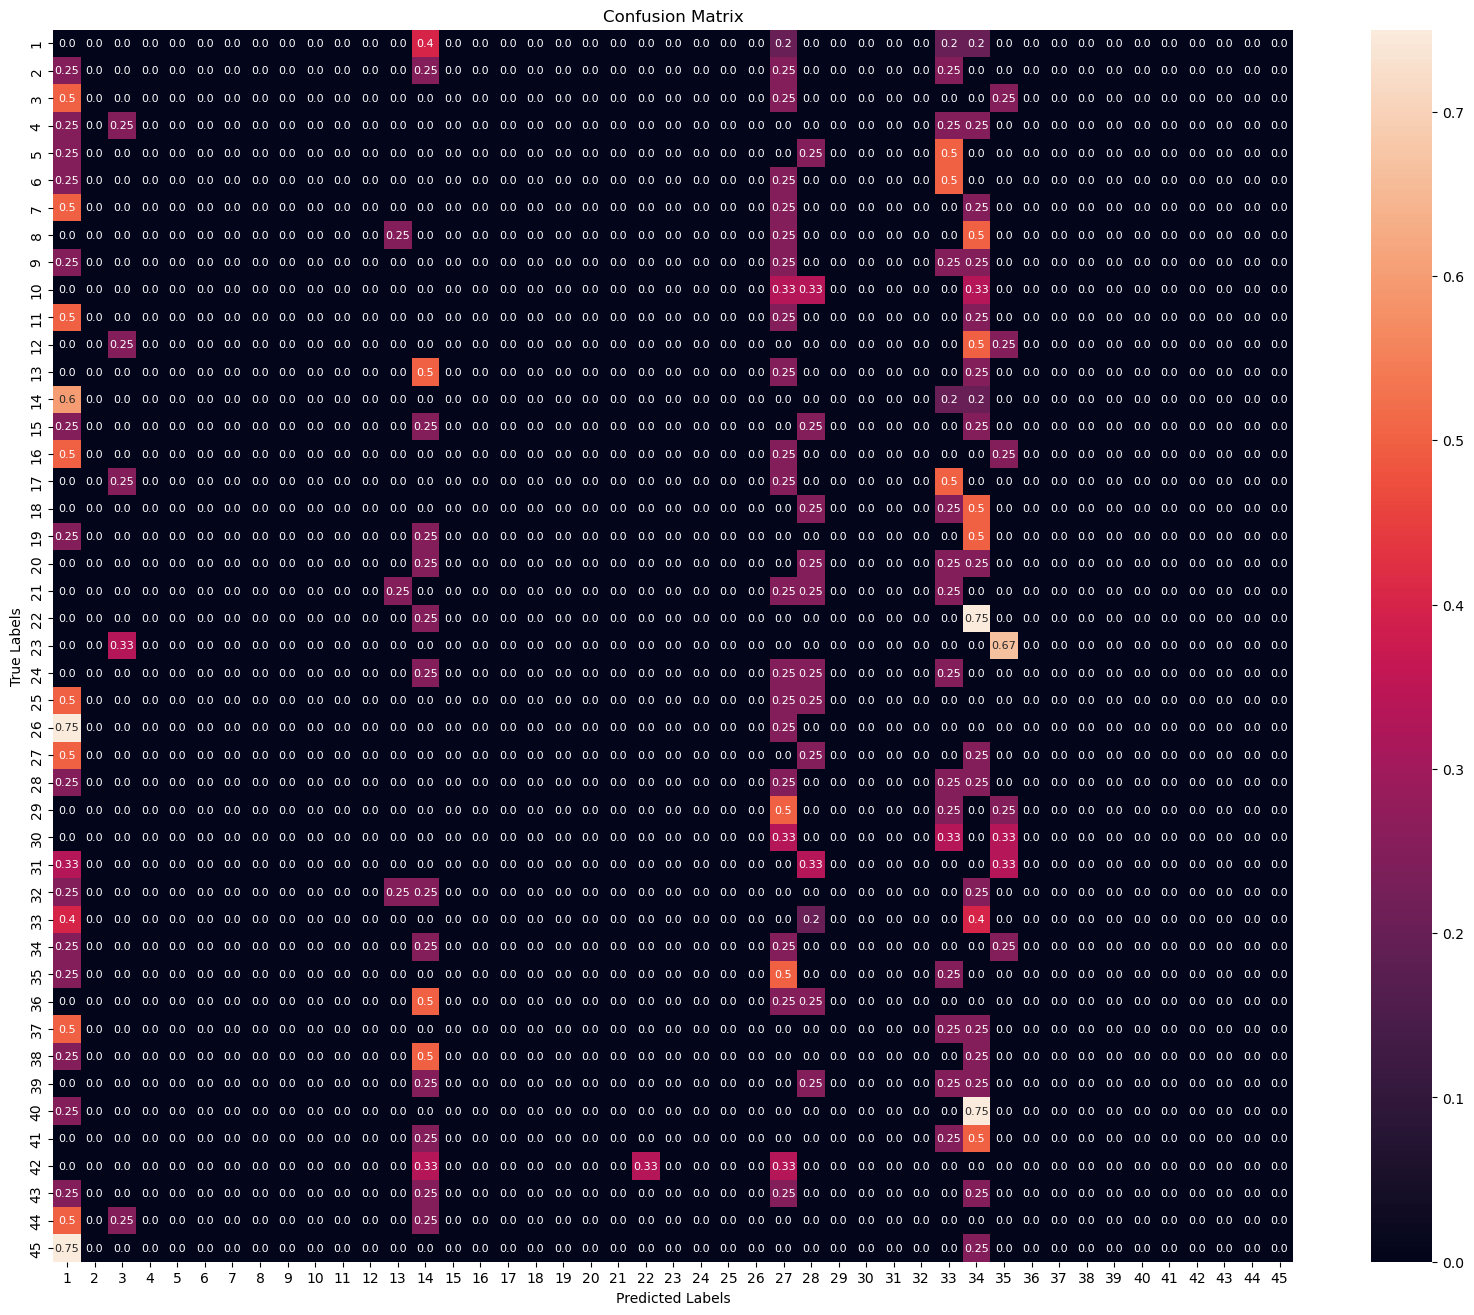

In [40]:
#%%
cm = confusion_matrix(test_labels, prediction_base, normalize='true', labels=svm_model_base.classes_)

plt.figure(figsize=(20, 16))
sns.heatmap(cm, fmt='.2', annot=True,annot_kws={"size": 8}, xticklabels=svm_model_base.classes_, yticklabels=svm_model_base.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
#plt.savefig(os.path.join(new_results_dir,'Cm_base2.png'))
plt.show()


In [ ]:
Acc_base= sum(test_labels_array == prediction_base)/len(test_labels_array)*100

In [ ]:
file = open( os.path.join(new_results_dir,'Acc_base.txt'), 'w')
# Write content to the file
file.write(str(Acc_base))

In [ ]:
#Acc_balanced_base = balanced_accuracy_score(test_labels_array, prediction_base)
#print(Acc_balanced_base)

In [ ]:
file = open(os.path.join(new_results_dir,'Acc_balanced_base.txt'), 'w')
# Write content to the file
file.write(str(Acc_balanced_base))

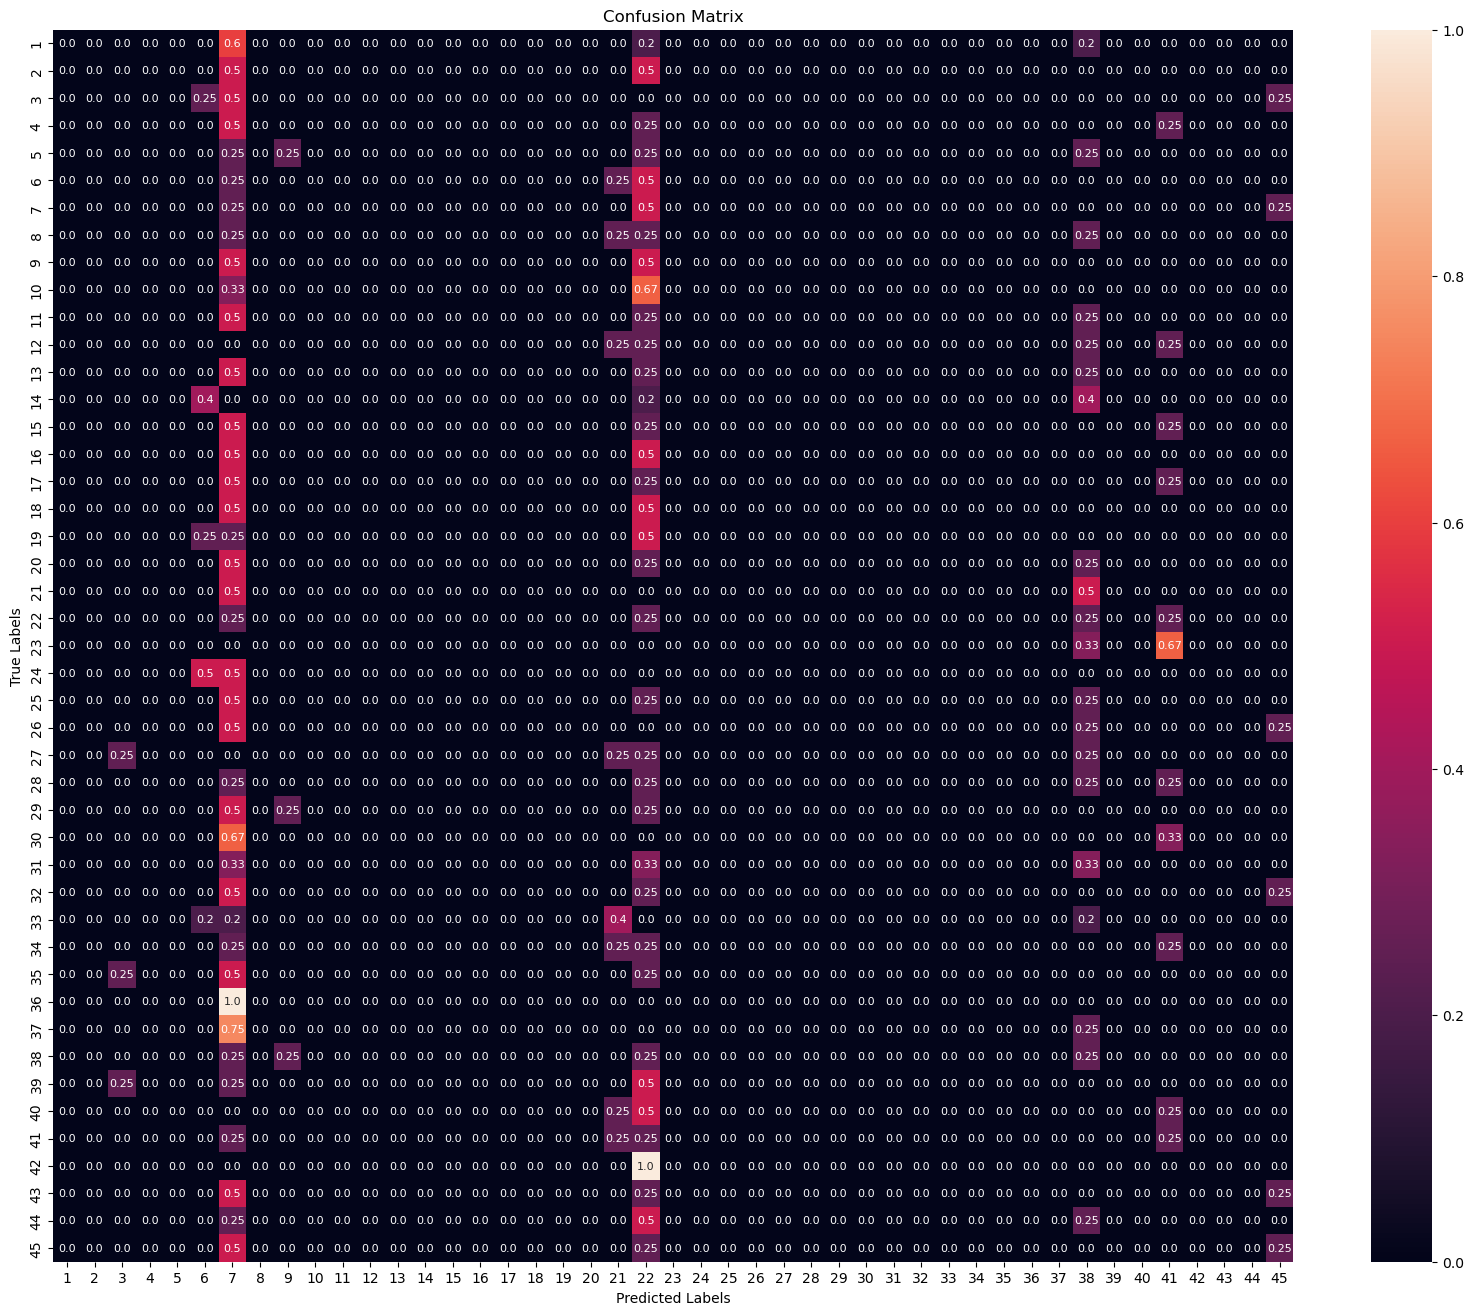

In [76]:
cm = confusion_matrix(test_labels, prediction_optimized, normalize='true', labels=svm_model_base.classes_)

plt.figure(figsize=(20, 16))
sns.heatmap(cm, fmt='.2', annot=True, annot_kws={"size": 8}, xticklabels=svm_model_base.classes_, yticklabels=svm_model_base.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.savefig(os.path.join(new_results_dir,'Cm_optim.png'))
plt.show()


In [78]:
Acc_optimized= sum(test_labels == prediction_optimized)/len(test_labels)*100
print(Acc_optimized)

2.8089887640449436


In [ ]:
file = open(os.path.join(new_results_dir,'Acc_optimized.txt'), 'w')
# Write content to the file
file.write(str(Acc_optimized))

In [79]:
Acc_optimized2 = balanced_accuracy_score(test_labels, prediction_optimized)
print(Acc_optimized2)

0.027777777777777776


In [ ]:
file = open(os.path.join(new_results_dir,'Acc_optimized2.txt'), 'w')
# Write content to the file
file.write(str(Acc_optimized2))

In [ ]:
f1 = f1_score(test_labels_array, prediction_optimized, average='weighted')
print(f1)

In [ ]:
file = open(os.path.join(new_results_dir,'F1.txt'), 'w')
# Write content to the file
file.write(str(f1))